In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [15]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
def cccscatter(x_axis,y_axis,a,b,c):
    x_values = x_axis
    y_values = y_axis
    
    
    line_position_x = x_values.min()
    line_position_y = (y_values.max())*0.99
    r_position_x = x_values.min()
    r_position_y = y_values.max()*0.96
    r_squared_position_x = x_values.min()
    r_squared_position_y = y_values.max()*0.93
    
    
    plt.scatter(x_values,y_values)
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)    
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    # y = mx + b
    regress_values = x_values * slope + intercept
    #print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    r_value_eq = "R = " + str(round(rvalue,2))
    r_squared = rvalue * rvalue
    r_squared_value_eq = "R Sqd = " + str(round(r_squared,2))
    
    
    print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_position_x,line_position_y),fontsize=12,color="red")
    plt.annotate(r_value_eq, (r_position_x,r_position_y),fontsize=12,color="black")
    plt.annotate(r_squared_value_eq, (r_squared_position_x,r_squared_position_y),fontsize=12,color="brown")
    # Print r square value
    print(f"The r (Correlation) is: {round(rvalue,2)}")
    # Show plot
    plt.savefig("Output/02_Analysis/" + a +".png")
    plt.show()


In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)
print

result = engine.execute('select * from measurement')#.fetchall()
print("Measurement Table Columsn are")
print(result.keys())
engine.execute('select * from measurement').fetchall()

# for v in result:
#     print v['id']
#     print v['name']

#engine.execute('select * from station').fetchall()

Measurement Table Columsn are
['id', 'station', 'date', 'prcp', 'tobs']


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Climate Analysis

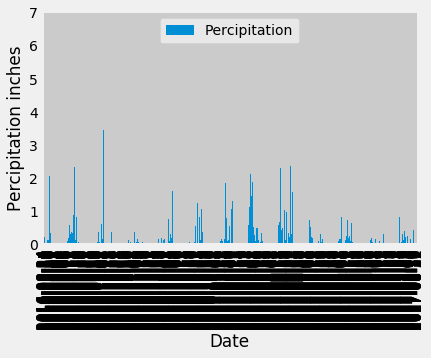

see the code for the interpretation or see the read me


In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Query the data, exclude the bad data of "None"
result = engine.execute('select * from measurement where prcp not like "%None%" and prcp > 0 and date > "2016-08-23" and date < "2017-08-23" order by date asc').fetchall()
#result = engine.execute('select * from measurement avg where prcp not like "%None%" and prcp > 0 and date > "2016-08-23" and date < "2017-08-23" Group by date order by date asc').fetchall()

#result = engine.execute('select * from measurement where prcp not like "%None%" order by date desc ').fetchall()

#hold variables in a list
date = []
value = []

#Identify the length of the items you just created
length = len(result)

# Unpack the data for safe keeping
for i in range(length):
    date.append(result[i][2])
    value.append(result[i][3])

#Let's see what you got
#print(date)
#print(value)

#Create the data frame for safe keeping
prcp_df = pd.DataFrame({
    "Date":date,
    "Percipitation":value
})

#show the data frame, make sure you got what you need
#prcp_df.head(13)

#Present the plot
prcp_df.plot('Date', 'Percipitation',kind='bar')
plt.xlabel('Date')
plt.ylabel('Percipitation inches')
plt.show()

print('see the code for the interpretation or see the read me')

#Results
#It apepars that the perciptiation increases as you progress the summer, which makes sense as the summer usually has
#additional rain and is the rainy season.
#As the weather progresses towards winter it is raining less


2017-08-23
2017-08-03 00:00:00
2016-08-03 00:00:00
 
 The data we are trying to get into the dataframe is the following
12187
9918
       id      station        Date  Percipitation  tobs
0   12187  USC00519523  2017-08-23           0.08  82.0
1   19550  USC00516128  2017-08-23           0.45  76.0
2   19549  USC00516128  2017-08-22           0.50  76.0
3    7634  USC00514830  2017-08-21           0.02  79.0
4   19548  USC00516128  2017-08-21           0.56  76.0
5    7633  USC00514830  2017-08-20           0.01  80.0
6   19546  USC00516128  2017-08-19           0.09  71.0
7   14959  USC00519281  2017-08-18           0.06  79.0
8   12183  USC00519523  2017-08-17           0.05  83.0
9   14958  USC00519281  2017-08-17           0.01  76.0
10  19544  USC00516128  2017-08-17           0.13  72.0
11  12182  USC00519523  2017-08-16           0.07  79.0
12  14957  USC00519281  2017-08-16           0.12  76.0
13  19543  USC00516128  2017-08-16           0.42  71.0
14   2718  USC00519397  2017-

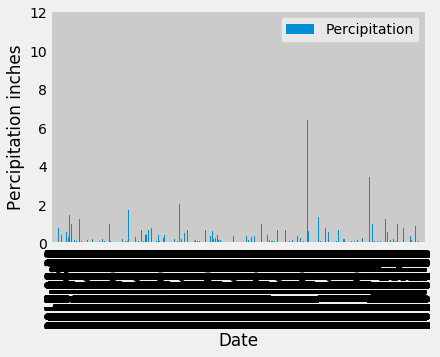

In [25]:
#TASK
# Calculate the date 1 year ago from the last data point in the database

#How I did it

#Pull the data that you want, and sort it so that you get the latest
result = engine.execute('select * from measurement where prcp not like "%None%" order by date desc').fetchall()
#hold variables in a list
date = []
value = []
#Identify the length of the items you just created
length = len(result)
# Unpack the data for safe keeping
for i in range(length):
    date.append(result[i][2])
    value.append(result[i][3])

#Last date is date of 0, as we pulled originally sorted from SQL above
print(date[0])
lastdate = date[0]

#Get the year month and day to put into the date time function
year = int(lastdate[0:4])
month = int(lastdate[6:7])
day = int(lastdate[9:10])

#Confirm you are good
print(datetime.datetime(year,month,day))

#Subtract one year
oneyearago = datetime.datetime(year,month,day) - datetime.timedelta(days=365)
print(oneyearago)

# Perform a query to retrieve the data and precipitation scores
oneyearago = "2016-08-03"
result = engine.execute('select * from measurement where date > '+ oneyearago +' and prcp > 0 order by date desc ').fetchall()


print(" ")
print(" The data we are trying to get into the dataframe is the following")
print(result[0][0])

#Create the blank lists that will build our dataframe
id = []
station = []
dates = []
prcp = []
tobs = []

#Identify the length of the items you just created
length = len(result)
print(length)

# Unpack the data for safe keeping
for i in range(length):
    id.append(result[i][0])
    station.append(result[i][1])
    dates.append(result[i][2])
    prcp.append(result[i][3])
    tobs.append(result[i][4])


# Save the query results as a Pandas DataFrame and set the index to the date column
result_df = pd.DataFrame({"id":id,"station":station,"Date":dates,"Percipitation":prcp,"tobs":tobs})

#Drop empty perciptiations
result_df = result_df.dropna()

#Check the datafarme we have pulled
print(result_df.head(15))

# Sort the dataframe by date

print("original SQL pull has sorted by date, see above")

# Use Pandas Plotting with Matplotlib to plot the data
result_df.plot('Date', 'Percipitation',kind='bar')
plt.xlabel('Date')
plt.ylabel('Percipitation inches')
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df['Percipitation'].describe()

count    9918.000000
mean        0.293217
std         0.601825
min         0.010000
25%         0.030000
50%         0.090000
75%         0.290000
max        11.530000
Name: Percipitation, dtype: float64

In [27]:
# Design a query to show how many stations are available in this dataset?

result = engine.execute('select * from station')#.fetchall()
#print("Station Table Columsn are")
#print(result.keys())
result = engine.execute('select * from station').fetchall()

station = []
length = len(result)
print(f"Number of stations are {length} and have the following names")

print(" ")

# Unpack the data for safe keeping
for i in range(length):
    station.append(result[i][2])
    print(result[i][2])


Number of stations are 9 and have the following names
 
WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

result = engine.execute('select station, COUNT(prcp) as "Count" from measurement group by station order by Count desc').fetchall()
#print(result)

station = []
count = []

length = len(result)

for i in range(length):
    print(f"Station Name is {result[i][0]} with a total count of {result[i][1]}")


Station Name is USC00519281 with a total count of 2772
Station Name is USC00513117 with a total count of 2696
Station Name is USC00519397 with a total count of 2685
Station Name is USC00519523 with a total count of 2572
Station Name is USC00516128 with a total count of 2484
Station Name is USC00514830 with a total count of 1937
Station Name is USC00511918 with a total count of 1932
Station Name is USC00517948 with a total count of 683
Station Name is USC00518838 with a total count of 342


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

result = engine.execute('select tobs from measurement where station like "USC00519281" order by tobs desc limit 1').fetchall()
print(f"The highest temperature recorded at station USC00519281 is {result[0][0]}")

result = engine.execute('select tobs, avg(tobs) from measurement where station like "USC00519281"').fetchall()
print(f"The average temperature recorded at station USC00519281 is {result[0][0]}")

result = engine.execute('select tobs from measurement where station like "USC00519281" order by tobs asc limit 1').fetchall()
print(f"The lowest temperature recorded at station USC00519281 is {result[0][0]}")

The highest temperature recorded at station USC00519281 is 85.0
The average temperature recorded at station USC00519281 is 70.0
The lowest temperature recorded at station USC00519281 is 54.0


The last month is 2017-08-18
Total datapoints are 355
The max temperature is 83.0
The min temperature is 59.0
19
58
119
139
20


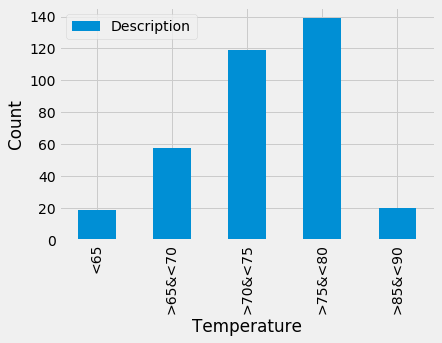

 
The data appears to be almost normally distributed, it has a right skew tail.  The data has a max of 83 and min of 59
 
I would imaigne this would be a great place to live, I'll put it on my bucket list of things to target to for retirement


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Find the last month of data
result = engine.execute('select date from measurement where station like "USC00519281" order by date desc limit 1').fetchall()
print(f"The last month is {result[0][0]}")

result = engine.execute('select tobs from measurement where station like "USC00519281" and date < "2017-08-18" and date > "2016-08-18" order by tobs desc').fetchall()
#Unpack the results into a list

lenght = len(result)
print(f"Total datapoints are {lenght}")

temp_l = []

for i in range(lenght):
    temp_l.append(result[i][0])

print(f"The max temperature is {max(temp_l)}")
print(f"The min temperature is {min(temp_l)}")

# Counters for the histagrams
a = 0
b = 0
c = 0
d = 0
e = 0

for i in temp_l:
    if i < 65:
        a += 1
    if i < 70 and i >= 65:
        b += 1
    if i < 75 and i >= 70:
        c += 1
    if i < 80 and i >= 75:
        d += 1
    if i < 85 and i >= 80:
        e += 1
print(a)
print(b)
print(c)
print(d)
print(e)




y_axis = [a,b,c,d,e]
x_axis = ["<65",">65&<70",">70&<75",">75&<80",">85&<90"]

stats_df = pd.DataFrame({"Count":x_axis,"Description":y_axis})


# Use Pandas Plotting with Matplotlib to plot the data
stats_df.plot('Count', 'Description',kind='bar')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
print(" ")
print("The data appears to be almost normally distributed, it has a right skew tail.  The data has a max of 83 and min of 59")
print(" ")
print("I would imaigne this would be a great place to live, I'll put it on my bucket list of things to target to for retirement")


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
